OrchardSpraysはスプレーの濃度（７段階）ごとにミツバチの駆除に関する実験結果

In [1]:
library(rstan)
library(brms)
rstan_options(auto_write=TRUE)
options(mc.cores=parallel::detectCores())

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: Rcpp

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Loading 'brms' package (version 2.10.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:rstan’:

    loo




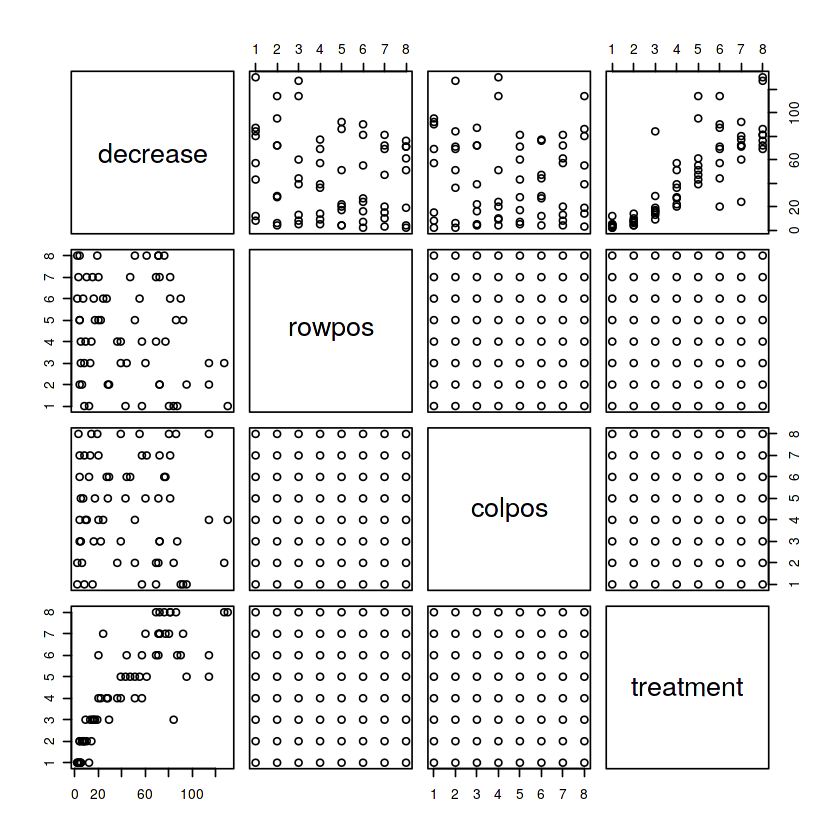

In [2]:
plot(OrchardSprays)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




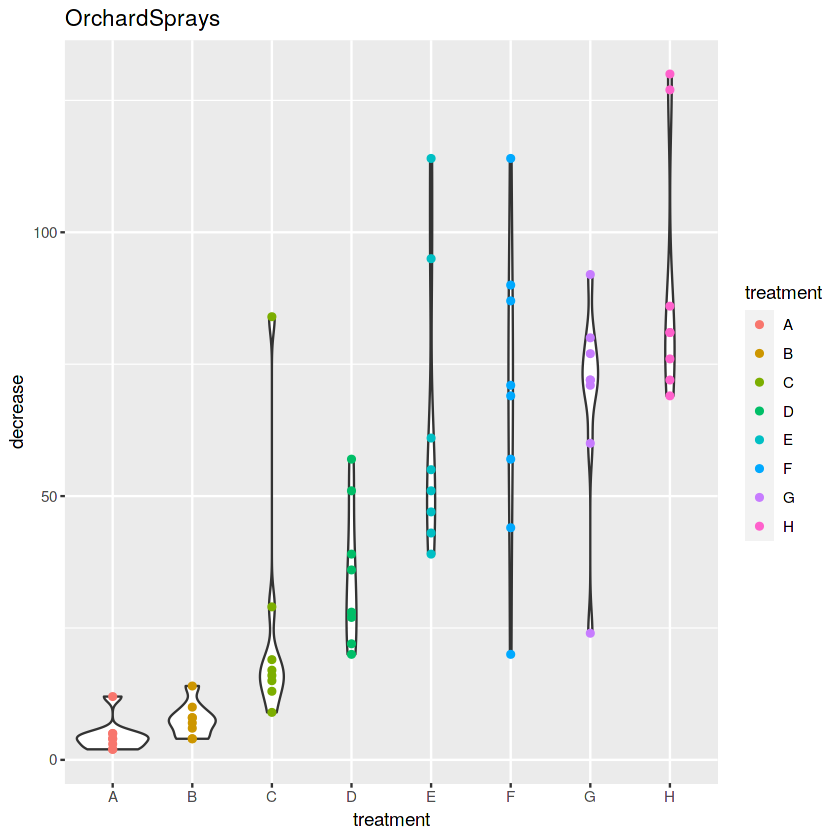

In [3]:
# 使用する列を選択
library(dplyr)
df <- select(.data = OrchardSprays,  treatment, decrease)
ggplot(data=df, mapping = aes(x=treatment, y=decrease)) + geom_violin() + geom_point(aes(color=treatment)) + labs(title="OrchardSprays")

In [4]:
anova_brms <- brm(
    formula = decrease  ~ treatment,
    family = gaussian(),
    data = df,
    seed = 1,
    prior = c(
        set_prior("", class = "Intercept"),
        set_prior("", class = "sigma")        
    )
)

Compiling the C++ model

Start sampling



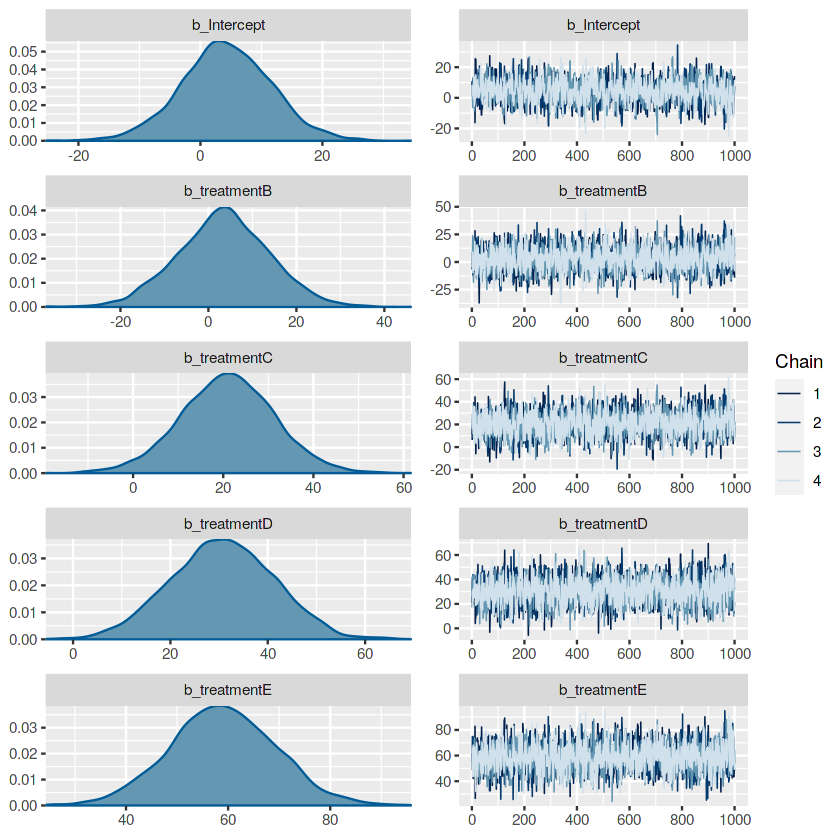

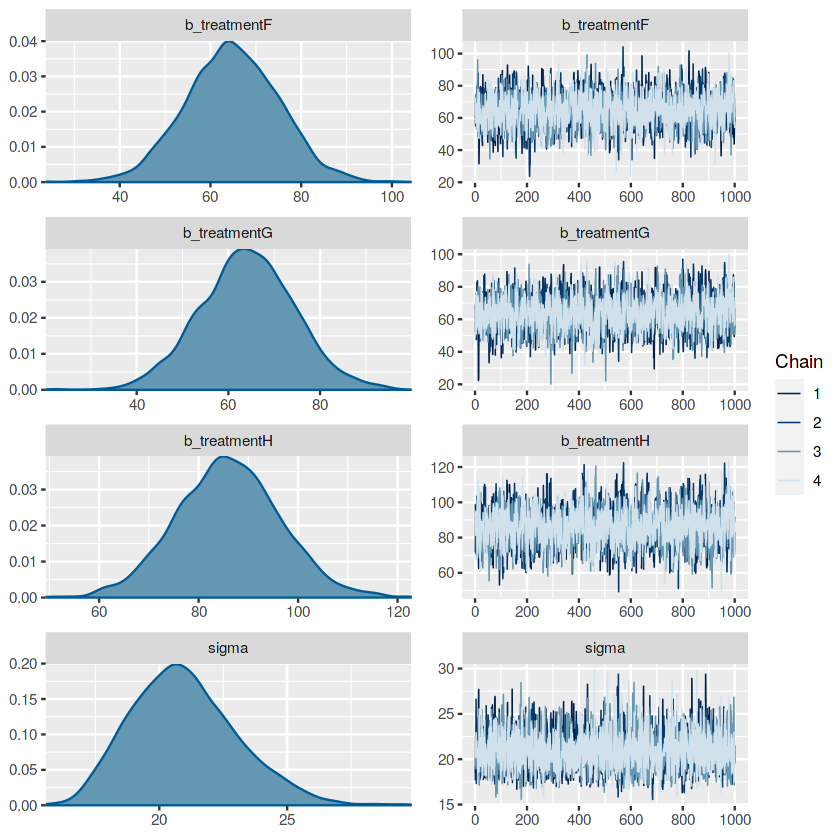

In [5]:
plot(anova_brms)

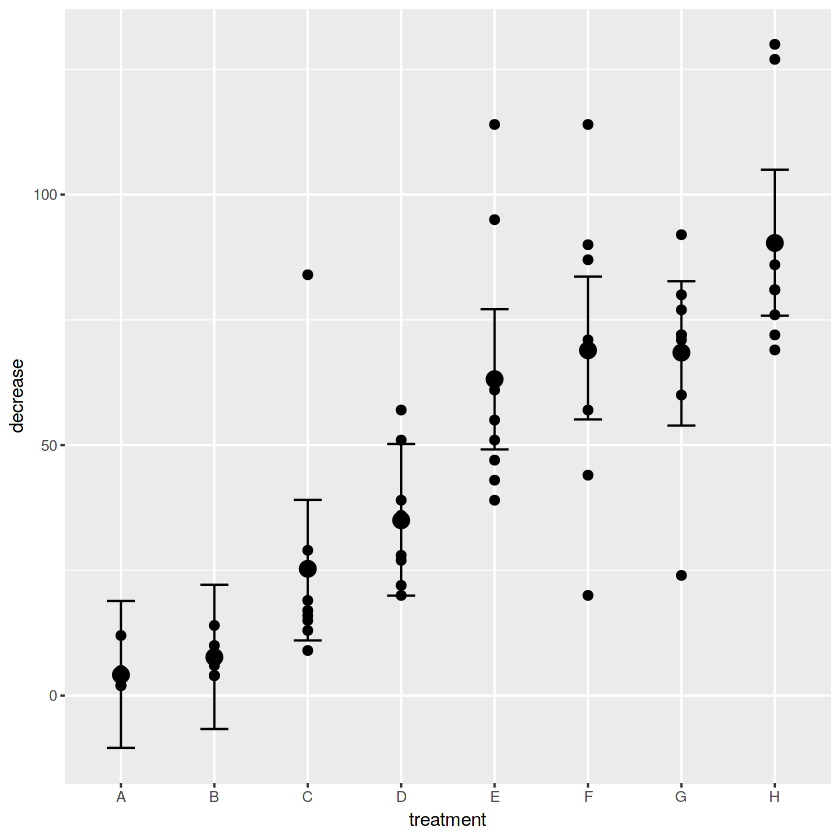

In [6]:
eff <- marginal_effects(anova_brms)
plot(eff, points=TRUE)

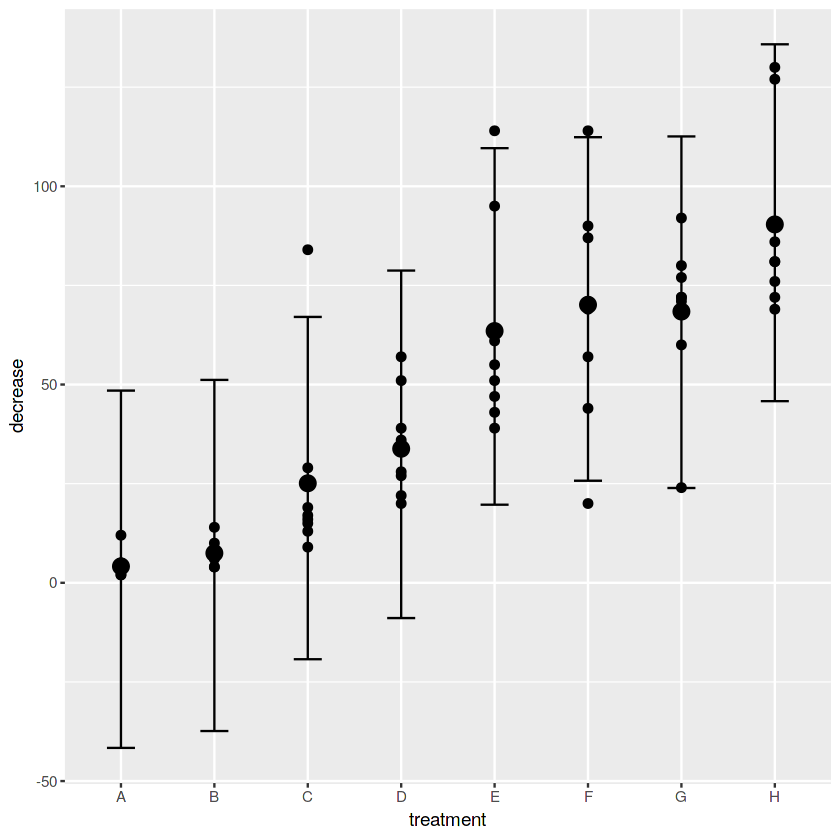

In [7]:
set.seed(1)
eff_pre<- marginal_effects(anova_brms, method = "predict")
plot(eff_pre, points=TRUE)